In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
import os

In [3]:
df = pd.read_csv('goldx.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9771 entries, 0 to 9770
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9771 non-null   object 
 1   Price   9771 non-null   float64
 2   Open    9771 non-null   float64
 3   High    9771 non-null   float64
 4   Low     9771 non-null   float64
dtypes: float64(4), object(1)
memory usage: 381.8+ KB


In [5]:
df.describe()

,Price,Open,High,Low
count,9771.000000,9771.000000,9771.000000,9771.000000
mean,638.922221,639.059523,641.936432,635.853220
std,419.776826,419.894281,422.504386,416.955696
min,253.000000,252.900000,252.900000,252.500000
25%,351.150000,351.200000,352.000000,350.500000
50%,407.900000,407.800000,409.000000,406.300000
75%,926.750000,926.000000,932.550000,920.500000
max,1888.700000,1909.000000,1911.600000,1864.000000


Text(0.5, 1.05, 'Correlation of df Features')

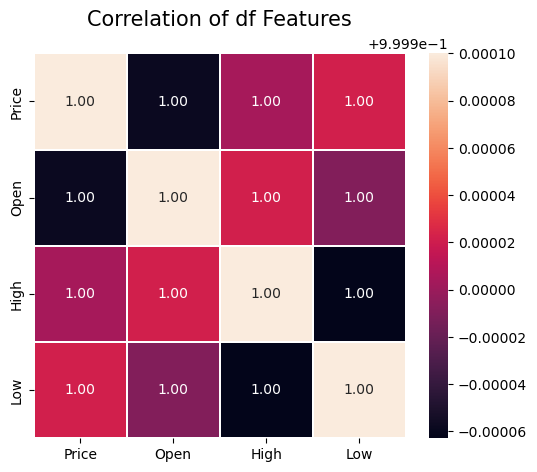

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [7]:
print (corr['Price'].sort_values(ascending=False), '\n')

Price    1.000000
Low      0.999922
High     0.999904
Open     0.999842
Name: Price, dtype: float64 



D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 1.1518317440157917
Kurtosis: -0.100964


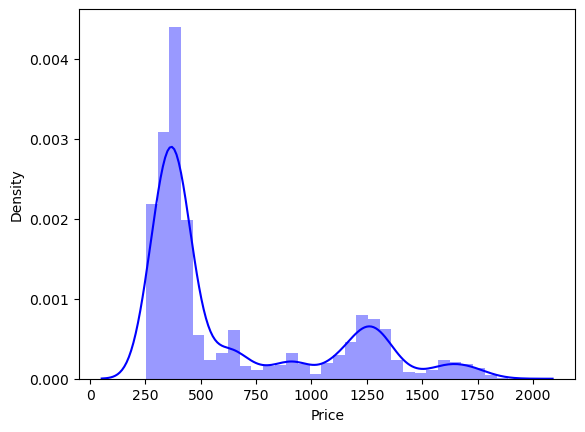

In [8]:
sns.distplot(df['Price'], color = 'blue')
print('Skewness: %f', df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())

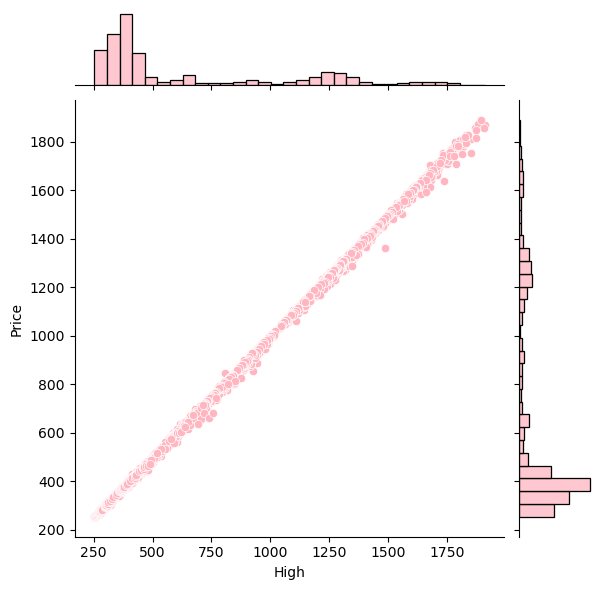

In [9]:
sns.jointplot(x =df['High'], y = df['Price'], color = 'lightpink')

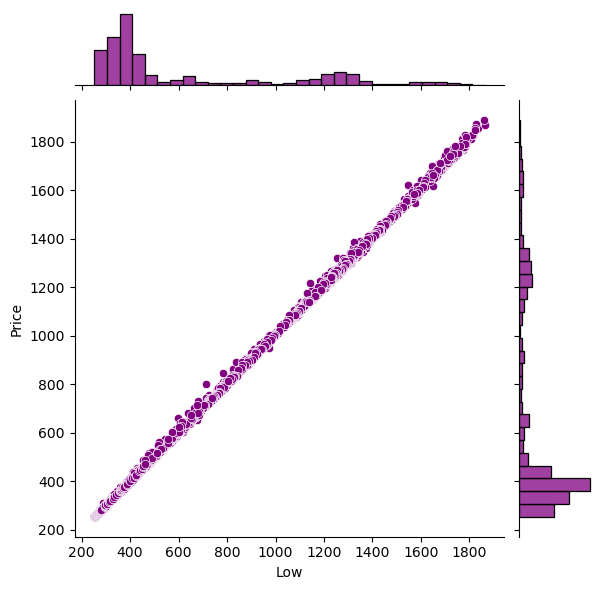

In [10]:
sns.jointplot(x =df['Low'], y = df['Price'], color = 'purple')

In [11]:
x_trail = df[['High','Low','Price']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [14]:
y_pred = regressor.predict(x_test)

In [15]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   2.086249053708427
MSE :   22.594503587043345
RMAE :   4.75336760487166


In [16]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9999845130171507
0.9998713550240586


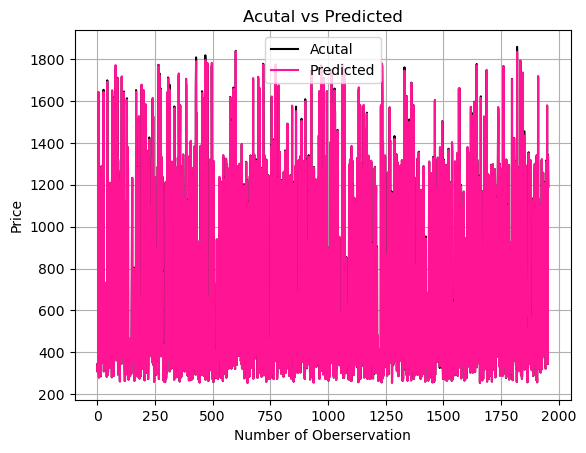

In [21]:
plt.plot(y_test, color = 'black', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('Price')
plt.legend()
plt.show()